In [2]:
#librerias a usar
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#cargar archivo csv
data = pd.read_csv('Tasmania_sin_nulos.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6230 entries, 0 to 6229
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6230 non-null   int64  
 1   id                                            6230 non-null   int64  
 2   listing_url                                   6230 non-null   object 
 3   last_scraped                                  6230 non-null   object 
 4   description                                   6230 non-null   object 
 5   host_id                                       6230 non-null   int64  
 6   host_url                                      6230 non-null   object 
 7   host_since                                    6230 non-null   object 
 8   host_response_time                            6230 non-null   object 
 9   host_response_rate                            6230 non-null   o

In [4]:
#Eliminamos la columnna Unnamed: 0 , que es un identificador de 1 a la n
data = data.drop(['Unnamed: 0'], axis=1)
data.isnull().sum()

id                                              0
listing_url                                     0
last_scraped                                    0
description                                     0
host_id                                         0
host_url                                        0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
accommodates                                    0


In [5]:
# Eliminar el símbolo '$' y las comas, convertir a float y luego a int
data['price'] = (
    data['price']
    .replace('[$,]', '', regex=True)  # Quita '$' y ','
    .astype(float)                     # Convierte a float para manejar decimales
    .fillna(0)                          # Reemplaza NaN por 0 (o cualquier otro valor)
    .astype(int)                        # Convierte a int
)

# Verificar el tipo de datos de la columna 'price'
print(data['price'].dtypes)

int64


In [6]:
#creo 2 dataframes para poder poder procesar los outliers, cualitatitvos y cuantitativoss
cuantitativas = data.select_dtypes(include=['float64', 'int64'])
cualitativas = data.select_dtypes(include=['object'])

In [7]:
cuantitativas.info()
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6230 entries, 0 to 6229
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6230 non-null   int64  
 1   host_id                                       6230 non-null   int64  
 2   host_listings_count                           6230 non-null   int64  
 3   host_total_listings_count                     6230 non-null   int64  
 4   accommodates                                  6230 non-null   int64  
 5   bathrooms                                     6230 non-null   float64
 6   bedrooms                                      6230 non-null   float64
 7   beds                                          6230 non-null   float64
 8   price                                         6230 non-null   int64  
 9   minimum_nights                                6230 non-null   i

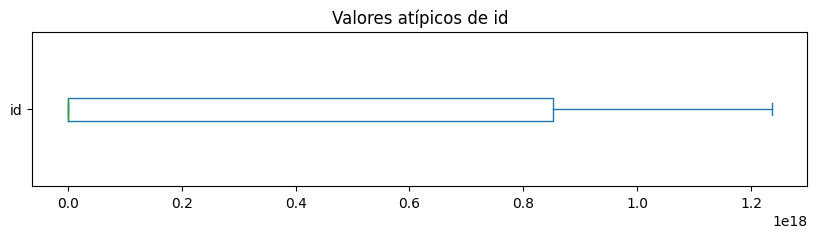

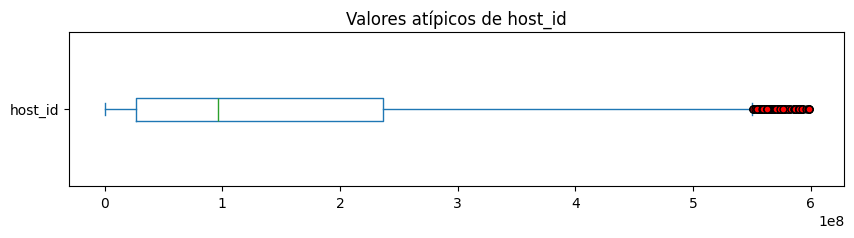

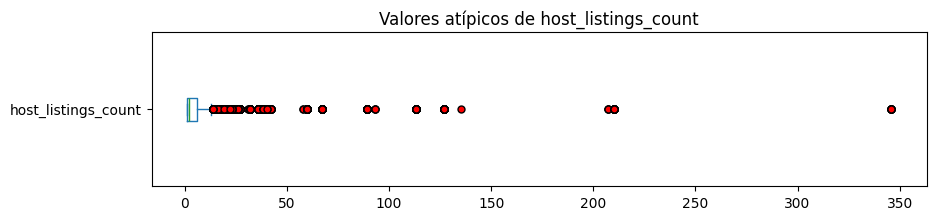

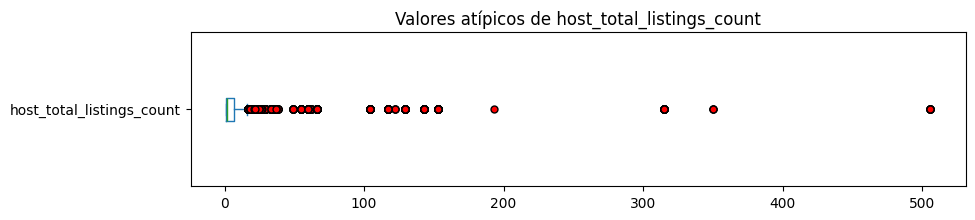

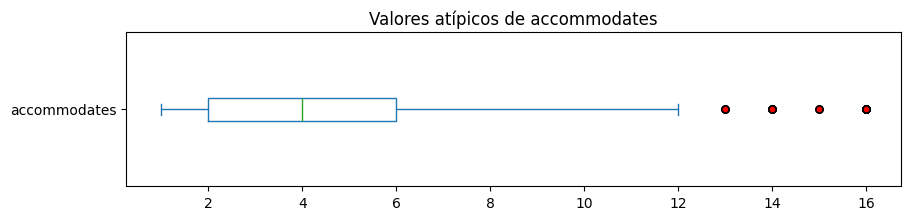

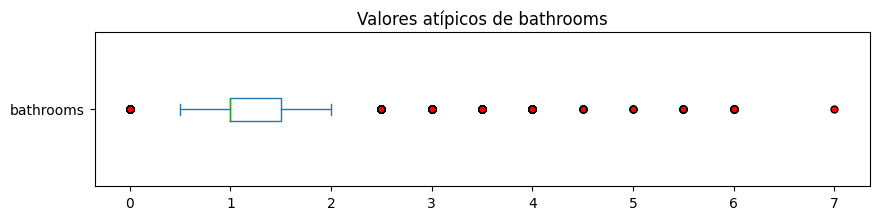

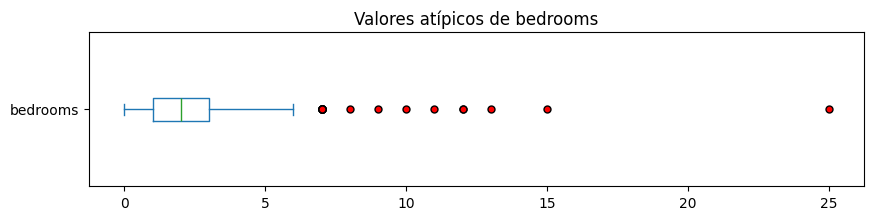

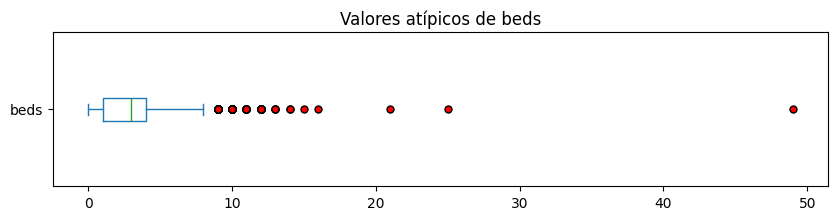

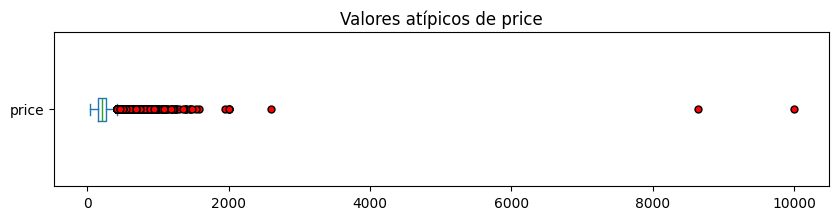

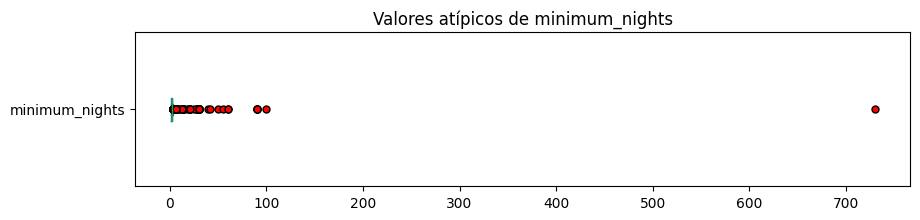

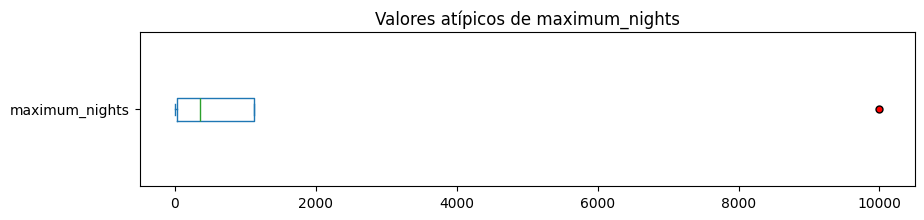

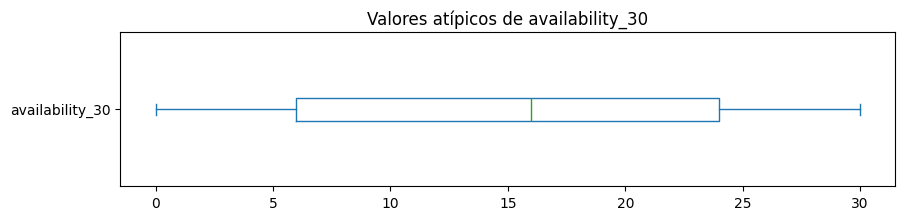

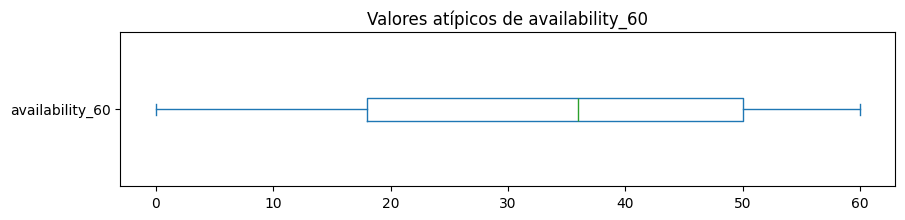

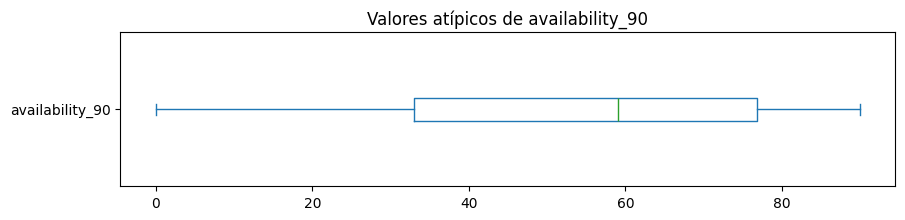

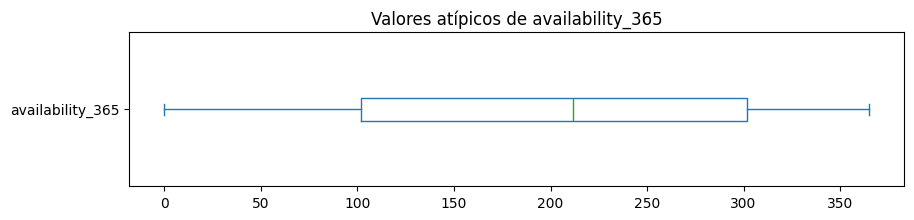

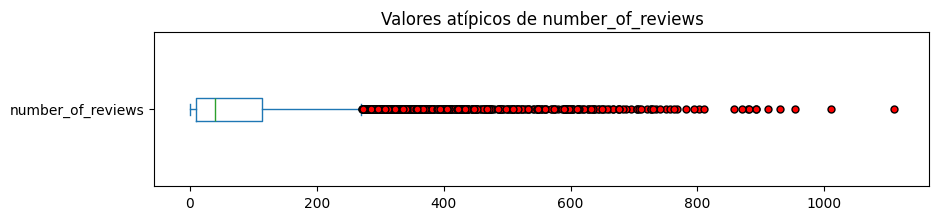

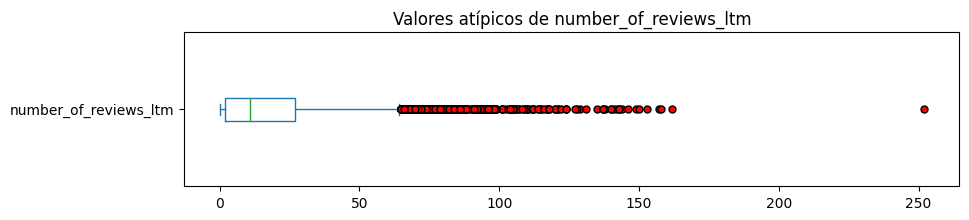

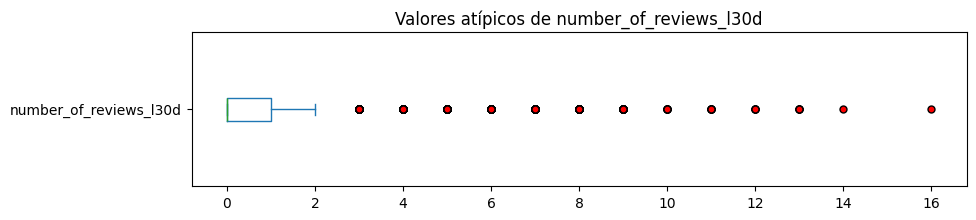

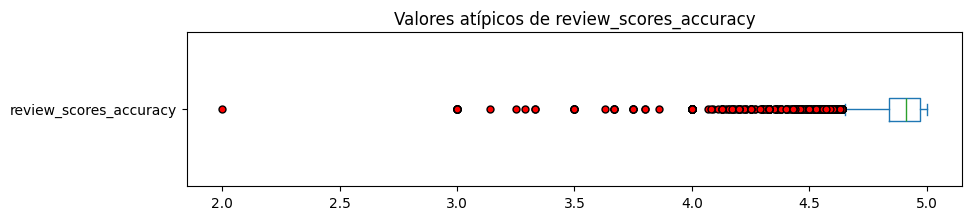

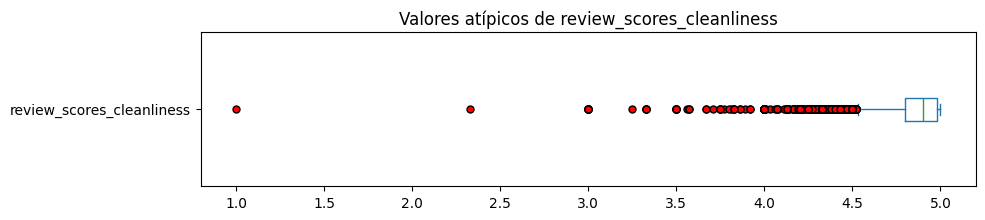

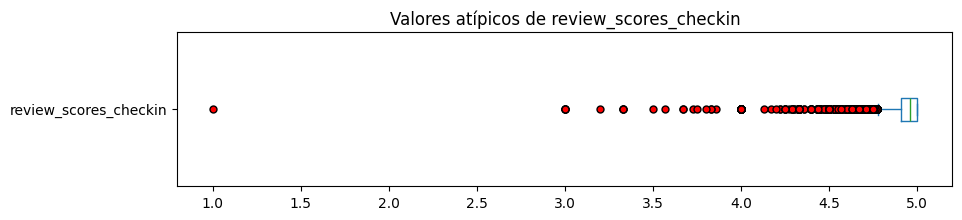

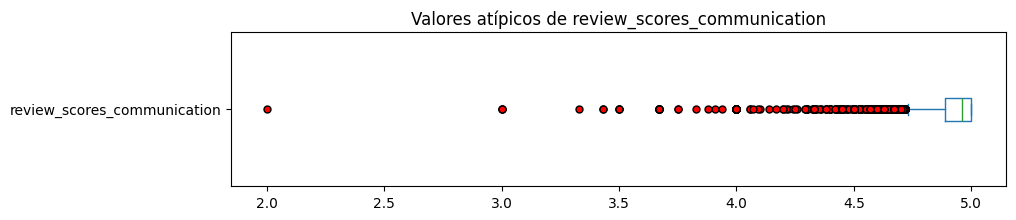

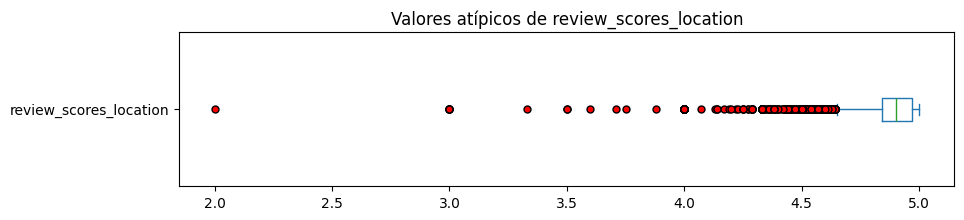

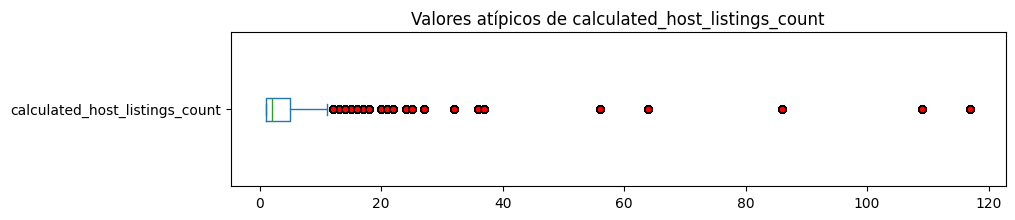

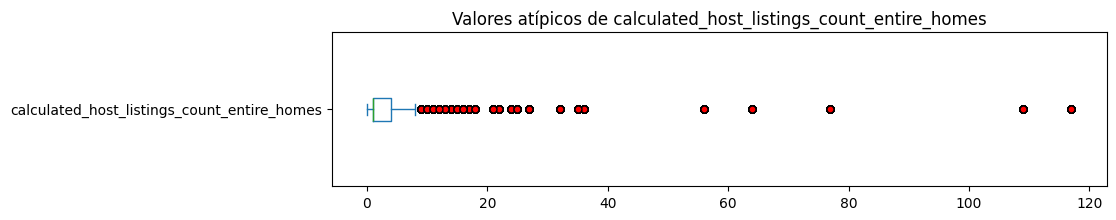

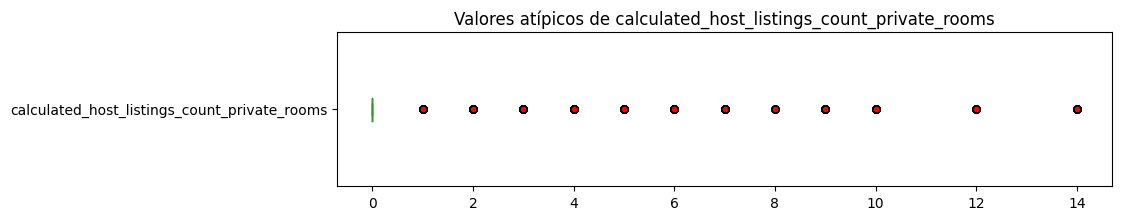

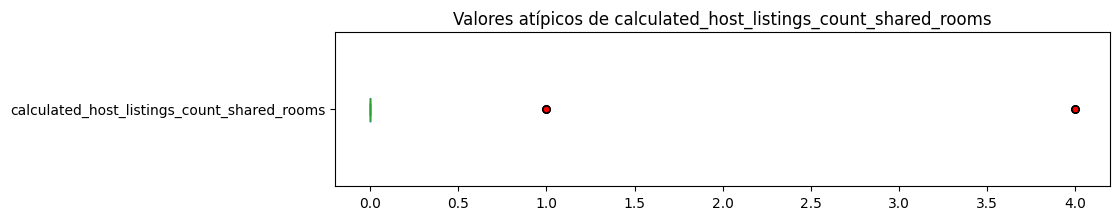

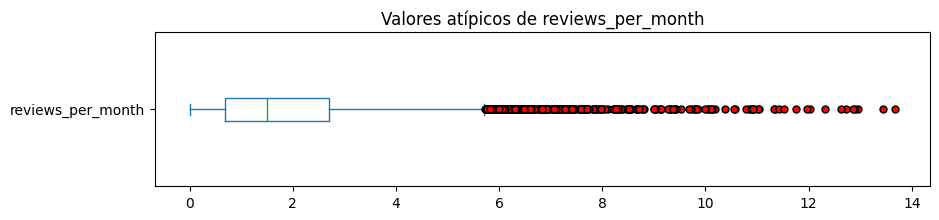

In [8]:
# Crear un diagrama de caja para cada columna en el DataFrame cuantitativas
for columna in cuantitativas.columns:
    plt.figure(figsize=(10, 2))
    cuantitativas[columna].plot(kind='box', vert=False, flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
    plt.title(f"Valores atípicos de {columna}")
    plt.show()

**Procesamiento "Desviación estandar" para eliminar outliers en dataframe**

In [9]:
#Metodo aplicando desviaion estandar. Encuentro los valores extremos
y = cuantitativas
Limite_superior = y.mean() + 3*y.std()  
Limite_inferior = y.mean() - 3*y.std()  
print("Limite superior permitido: ", Limite_superior)
print("Limite inferior permitido: ", Limite_inferior)

Limite superior permitido:  id                                              1.771189e+18
host_id                                         6.548503e+08
host_listings_count                             1.046979e+02
host_total_listings_count                       1.396073e+02
accommodates                                    1.209625e+01
bathrooms                                       3.229140e+00
bedrooms                                        5.782325e+00
beds                                            8.571315e+00
price                                           9.008037e+02
minimum_nights                                  3.160129e+01
maximum_nights                                  1.994518e+03
availability_30                                 4.623161e+01
availability_60                                 9.216886e+01
availability_90                                 1.389549e+02
availability_365                                5.429654e+02
number_of_reviews                               4.607304e

In [10]:
#obtenemos datos y los outliers se convierten en nulos en el Dataframe
data3 = cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
data3.isnull().sum()

id                                                0
host_id                                           0
host_listings_count                             255
host_total_listings_count                       149
accommodates                                     46
bathrooms                                        82
bedrooms                                         56
beds                                             74
price                                            54
minimum_nights                                   12
maximum_nights                                    1
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               145
number_of_reviews_ltm                           124
number_of_reviews_l30d                          115
review_scores_accuracy                          120
review_score

In [11]:
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(), 2))
data_clean.isnull().sum()

id                                              0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_accuracy                          0
review_scores_cleanliness                       0


**Procedimiento "cuantiles" para sustituir outliers en dataframe**

In [12]:
#Metodo para aplicar cuartiles. Encuentro cuartiles de .25 y .75
y = cuantitativas

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q2
iqr = percentile75 - percentile25   

Limite_superior_iqr = percentile75 + 1.5*iqr
Limite_inferior_iqr = percentile75 - 1.5*iqr

print("Limite superior permitido: ", Limite_superior_iqr)
print("Limite inferior permitido: ", Limite_inferior_iqr)

Limite superior permitido:  id                                              2.128735e+18
host_id                                         5.507923e+08
host_listings_count                             1.350000e+01
host_total_listings_count                       1.600000e+01
accommodates                                    1.200000e+01
bathrooms                                       2.250000e+00
bedrooms                                        6.000000e+00
beds                                            8.500000e+00
price                                           4.125000e+02
minimum_nights                                  3.500000e+00
maximum_nights                                  2.766000e+03
availability_30                                 5.100000e+01
availability_60                                 9.800000e+01
availability_90                                 1.423750e+02
availability_365                                6.020000e+02
number_of_reviews                               2.700000e

In [13]:
#obtenemos datos limpios del dataframe
data3_iqr = cuantitativas[(y <= Limite_superior_iqr) & (y >= Limite_inferior_iqr)]  
data3_iqr.isnull().sum()

id                                                 0
host_id                                          122
host_listings_count                             1030
host_total_listings_count                        997
accommodates                                      46
bathrooms                                        495
bedrooms                                          20
beds                                              74
price                                            880
minimum_nights                                   178
maximum_nights                                     1
availability_30                                    0
availability_60                                  946
availability_90                                  958
availability_365                                 596
number_of_reviews                                493
number_of_reviews_ltm                            316
number_of_reviews_l30d                           828
review_scores_accuracy                        

In [14]:
#Reemplazar valores atipicos (nulos) del dataframe con "mean"
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(), 2))
data4_iqr.isnull().sum()

id                                              0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_accuracy                          0
review_scores_cleanliness                       0


In [15]:
#unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6230 entries, 0 to 6229
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   6230 non-null   object 
 1   last_scraped                                  6230 non-null   object 
 2   description                                   6230 non-null   object 
 3   host_url                                      6230 non-null   object 
 4   host_since                                    6230 non-null   object 
 5   host_response_time                            6230 non-null   object 
 6   host_response_rate                            6230 non-null   object 
 7   host_acceptance_rate                          6230 non-null   object 
 8   host_is_superhost                             6230 non-null   object 
 9   host_verifications                            6230 non-null   o

In [16]:
Datos_limpios.to_csv('Tasmania_datos_limpios.csv')
df = pd.read_csv('Tasmania_datos_limpios.csv')
df.isnull().sum()

Unnamed: 0                                      0
listing_url                                     0
last_scraped                                    0
description                                     0
host_url                                        0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_verifications                              0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
amenities                                       0
has_availability                                0
calendar_last_scraped                           0
first_review                                    0
